In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study = pd.merge (mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = mouse_study ['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_duplicated = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', "Timepoint"])]
mouse_ID_duplicated = mouse_study_duplicated["Mouse ID"].unique()
mouse_ID_duplicated

array(['g989'], dtype=object)

In [5]:
#Calculating the total number of duplicated Mouse ID
mouse_duplicated_count = len(mouse_ID_duplicated)
mouse_duplicated_count

1

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
display_duplicate = mouse_study_duplicated.loc[mouse_study_duplicated.duplicated(subset=['Mouse ID'],keep=False),:]
display_duplicate1 = pd.DataFrame(display_duplicate)
display_duplicate1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#Display the number of unique mice IDs in the data
unique_mouseid = mouse_study ["Mouse ID"].unique()
unique_mouseid

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study.loc[mouse_study["Mouse ID"]!= ("".join((mouse_ID_duplicated))),:]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Assemble the resulting series into a single summary dataframe.
# mean of the tumour volume. 
mean_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).mean()["Tumour Volume (mm3)"])
mean_clean_data = mean_clean_data.rename(columns={"Tumour Volume (mm3)":"Mean"})


In [11]:
# median of the tumour volume.
median_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).median()["Tumour Volume (mm3)"])
median_clean_data = median_clean_data.rename(columns={"Tumour Volume (mm3)":"Median"})


In [12]:
#variance of the tumour volume.
variance_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).var()["Tumour Volume (mm3)"])
variance_clean_data = variance_clean_data.rename(columns={"Tumour Volume (mm3)": "Variance"})


In [13]:
#standard deviation of the tumour volume.
std_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).std()["Tumour Volume (mm3)"])
std_clean_data = std_clean_data.rename(columns={"Tumour Volume (mm3)": "Standard Deviation"})


In [14]:
# SEM of the tumour volume.
sem_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).sem()["Tumour Volume (mm3)"])
sem_clean_data = sem_clean_data.rename(columns={"Tumour Volume (mm3)": "SEM"})

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
statistics_clean_data = mean_clean_data.join(median_clean_data).join(variance_clean_data).join(std_clean_data).join(sem_clean_data)
statistics_clean_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_table = clean_data.groupby(["Drug Regimen"]).agg({"Tumour Volume (mm3)": ['mean','median','var','std','sem']})
agg_summary_table = agg_summary_table.rename(columns={'mean': "Mean", "var":"Variance", "std": "Standard Deviation", "median": "Median", "sem": "SEM"})
agg_summary_table

Tumour Volume (mm3)                                           \
                            Mean     Median   Variance Standard Deviation   
Drug Regimen                                                                
Capomulin              40.675741  41.557809  24.947764           4.994774   
Ceftamin               52.591172  51.776157  39.290177           6.268188   
Infubinol              52.884795  51.820584  43.128684           6.567243   
Ketapril               55.235638  53.698743  68.553577           8.279709   
Naftisol               54.331565  52.509285  66.173479           8.134708   
Placebo                54.033581  52.288934  61.168083           7.821003   
Propriva               52.320930  50.446266  43.852013           6.622085   
Ramicane               40.216745  40.673236  23.486704           4.846308   
Stelasyn               54.233149  52.431737  59.450562           7.710419   
Zoniferol              53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

Bar and Pie Charts

In [17]:
#Set DataFrame for each drug regiment by using groupby
drug_regiment = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).sum()["Timepoint"])
drug_regiment = drug_regiment.reset_index().sort_values(by='Timepoint', ascending = False)

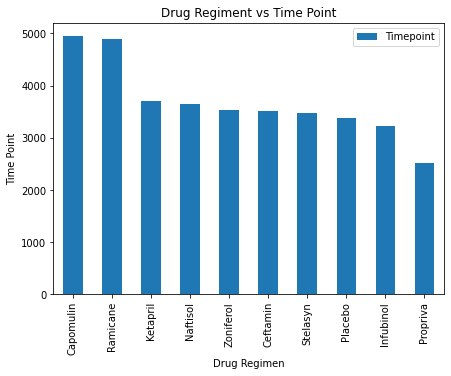

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regiment_bar = drug_regiment.plot(x = "Drug Regimen", y= "Timepoint", kind = "bar", figsize = (7,5))
drug_regiment_bar.set_xlabel ("Drug Regimen")
drug_regiment_bar.set_ylabel ("Time Point")
drug_regiment_bar.set_title ("Drug Regiment vs Time Point")
plt.show()
plt.tight_layout()

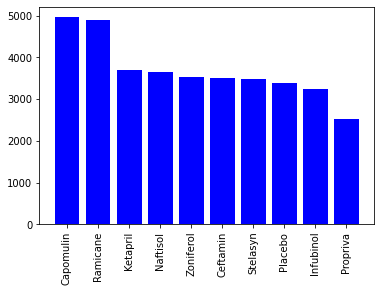

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



x_axis = np.arange(len(drug_regiment))
tick_locations = [values for values in x_axis]
plt.bar(x_axis, drug_regiment["Timepoint"], color = 'b', align = "center")
plt.xticks(tick_locations, drug_regiment["Drug Regimen"], rotation = 90)

plt.show()
plt.tight_layout()

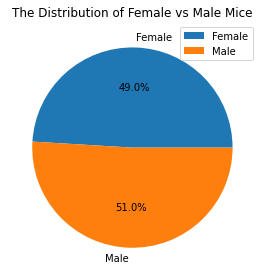

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean_data.groupby(clean_data["Sex"]).count().plot ( y="Mouse ID", kind = "pie", autopct="%1.1f%%")
gender_mice.set_title ("The Distribution of Female vs Male Mice")
gender_mice.set_ylabel("")
plt.tight_layout()
plt.show()

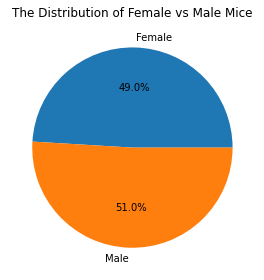

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice_plt = clean_data.groupby(clean_data["Sex"]).count()
gender_mice_plt = pd.DataFrame(gender_mice_plt, columns = ["Mouse ID"])
gender_mice_plt = gender_mice_plt.reset_index()
my_label = gender_mice_plt["Sex"]
my_value = gender_mice_plt["Mouse ID"]
plt.ylabel("")
plt.pie(my_value, labels= my_label, autopct='%1.1f%%')
plt.title ("The Distribution of Female vs Male Mice")
plt.tight_layout()
plt.show()


Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumour_volume = clean_data.drop_duplicates(subset=["Drug Regimen"], keep='last')
final_tumour_volume = final_tumour_volume [["Mouse ID", "Drug Regimen", "Tumour Volume (mm3)", "Timepoint"]]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(clean_data.groupby(['Mouse ID'])['Timepoint'].max())
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merge_timepoint_tumour = last_timepoint. merge (clean_data, on = ["Mouse ID", "Timepoint"], how ="inner")

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
tumour_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatment_drug_list:

#quartiles 
# Locate the rows which contain mice on each drug and get the tumour volumes
    tumour_volume = merge_timepoint_tumour.loc[merge_timepoint_tumour["Drug Regimen"] == treatment, "Tumour Volume (mm3)"]
    
# add subset 
    tumour_list.append(tumour_volume)
    
# Determine outliers using upper and lower bounds
    quartiles = tumour_volume.quantile ([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print (f"The lower quartiles of the tumour volumes is: {lowerq}")
    print (f"The upper quartiles of the tumour volumes is: {upperq}")
    print (f"The interquartile range of tumour volume is: {iqr}")
    print (f"The median of tumour volume is: {quartiles[0.5]}\n ")
    
    lower_bound = lowerq- (1.5*iqr)
    upper_bound = upperq +(1.5*iqr)    
    outliers_tumour = merge_timepoint_tumour.loc[(merge_timepoint_tumour["Tumour Volume (mm3)"] < lower_bound) | (merge_timepoint_tumour["Tumour Volume (mm3)"] > upper_bound)]
    print (f"The values below {lower_bound} may be outliers")
    print (f"Value above {upper_bound} may be outliers")
    outliers_tumour


The lower quartiles of the tumour volumes is: 32.37735684
The upper quartiles of the tumour volumes is: 40.1592203
The interquartile range of tumour volume is: 7.781863460000004
The median of tumour volume is: 38.125164399999996
 
The values below 20.70456164999999 may be outliers
Value above 51.83201549 may be outliers
The lower quartiles of the tumour volumes is: 31.56046955
The upper quartiles of the tumour volumes is: 40.65900627
The interquartile range of tumour volume is: 9.098536719999998
The median of tumour volume is: 36.56165229
 
The values below 17.912664470000003 may be outliers
Value above 54.30681135 may be outliers
The lower quartiles of the tumour volumes is: 54.04860769
The upper quartiles of the tumour volumes is: 65.52574285
The interquartile range of tumour volume is: 11.477135160000003
The median of tumour volume is: 60.16518046
 
The values below 36.83290494999999 may be outliers
Value above 82.74144559000001 may be outliers
The lower quartiles of the tumour volu

[]

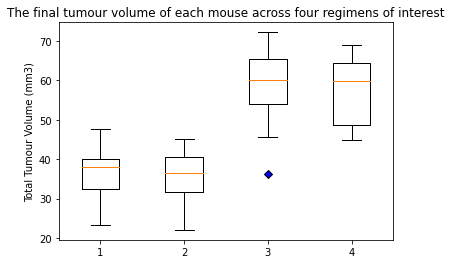

In [24]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
colours = dict (markerfacecolor = 'b', marker= 'D')
fig1, x_axis2 = plt.subplots()
x_axis2.set_title ("The final tumour volume of each mouse across four regimens of interest")
x_axis2.set_ylabel ("Total Tumour Volume (mm3)")
plt.boxplot (tumour_list, flierprops=colours)
plt.plot()


Line and Scatter Plots

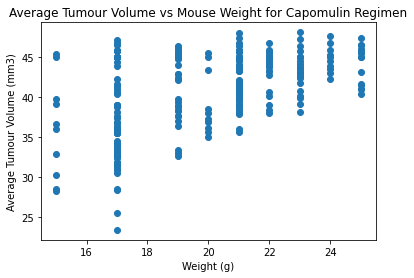

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_table['Weight (g)'],capomulin_table['Tumour Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title ("Average Tumour Volume vs Mouse Weight for Capomulin Regimen")
plt.show()

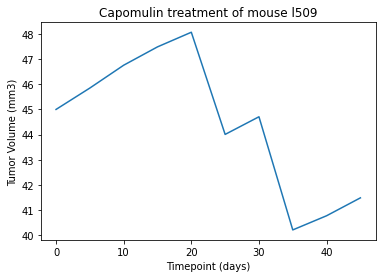

In [26]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumour Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

[]

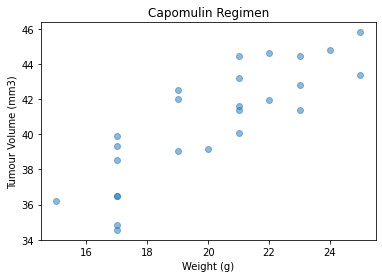

In [27]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
scatter_tumour_volume = capomulin_table.groupby("Mouse ID").mean()[["Tumour Volume (mm3)", "Weight (g)"]]
x_axis = scatter_tumour_volume["Weight (g)"]
y_axis = scatter_tumour_volume["Tumour Volume (mm3)"]
plt.title ("Capomulin Regimen")
plt.xlabel ("Weight (g)")
plt.ylabel ("Tumour Volume (mm3)")
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.plot()

Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


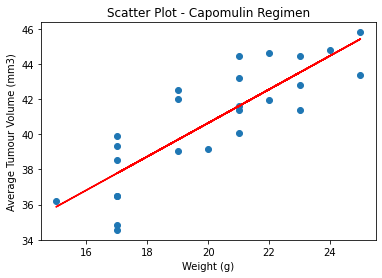

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(scatter_tumour_volume['Weight (g)'],scatter_tumour_volume['Tumour Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(scatter_tumour_volume['Weight (g)'],scatter_tumour_volume['Tumour Volume (mm3)'])

y_values = scatter_tumour_volume['Weight (g)']*model[0]+model[1]
plt.scatter(scatter_tumour_volume['Weight (g)'],scatter_tumour_volume['Tumour Volume (mm3)'])
plt.plot(scatter_tumour_volume['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title ("Scatter Plot - Capomulin Regimen")
plt.show()

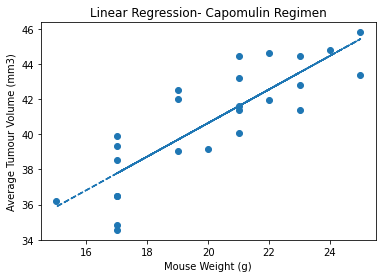

In [29]:
# Linear regression model for mouse weight and average tumour volume for the Capomulin regimen
#create an equation of line to calculate the average tumour volume:
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress (x_axis, y_axis)
#create an equation of line to calculate predicted tumour volume
t_fit = t_slope*x_axis + t_int

plt.scatter(scatter_tumour_volume['Weight (g)'],scatter_tumour_volume['Tumour Volume (mm3)'])
plt.plot(x_axis,t_fit, "--")
plt.xlabel ("Mouse Weight (g)")
plt.ylabel ("Average Tumour Volume (mm3)")
plt.title ("Linear Regression- Capomulin Regimen")
plt.show()